# Variation du salaire de base

Initialisations Python

In [23]:
from datetime import date
import matplotlib.pyplot as plt
#importer numpy permet de coler deux sections de courbes (nécessaire quand on fait varier le salaire de base en-dessous du SMIC mensuel)
import numpy as np
import openfisca_france
from openfisca_core import tools
%matplotlib inline

Initialisations OpenFisca

In [24]:
tax_benefit_system = openfisca_france.FranceTaxBenefitSystem()

In [25]:
date_naissance_parent1 = date(1980, 1, 1)

In [26]:
nb_heures_par_mois_temps_plein = 35 * 52 / 12.0
smic_horaire = 9.670

In [27]:
# On commence par simuler la variation de salaire entre 0 € et le SMIC mensuel
# Entre 0 € et le SMIC mensuel, quand le salaire de base augmente, c'est le volume horaire qui augmente (de 0 à 35 heures hendomadaires)
# Le salaire horaire quant à lui reste fixé au SMIC horaire

scenario_under_smic = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        [
            dict(
                count = 10,
                min = 0,
                max = nb_heures_par_mois_temps_plein,
                name = 'heures_remunerees_volume',
                ),
            dict(
                count = 10,
                min = 0,
                max = nb_heures_par_mois_temps_plein * smic_horaire,
                name = 'salaire_de_base',
                ),
            ],
        ],
    period = '2016-01',
    parent1 = dict(
        date_naissance = date_naissance_parent1,
        contrat_de_travail = 1, # temps partiel
        allegement_fillon_mode_recouvrement = 1, # anticipe_regularisation_fin_de_periode
        ),
    )

In [28]:
simulation_under_smic = scenario_under_smic.new_simulation()

In [29]:
salaire_de_base_under_smic = simulation_under_smic.calculate('salaire_de_base', '2016-01')
salaire_de_base_under_smic

array([    0.        ,   162.95741272,   325.91482544,   488.8722229 ,
         651.82965088,   814.78704834,   977.7444458 ,  1140.7019043 ,
        1303.65930176,  1466.61669922], dtype=float32)

In [30]:
allegement_fillon_under_smic = simulation_under_smic.calculate('allegement_fillon', '2016-01')
allegement_fillon_under_smic

array([   0.        ,   45.66066742,   91.32133484,  136.98199463,
        182.64266968,  228.30332947,  273.96398926,  319.62466431,
        365.28533936,  410.94598389], dtype=float32)

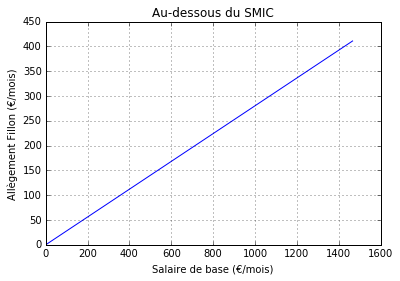

In [31]:
plt.plot(salaire_de_base_under_smic, allegement_fillon_under_smic)
plt.xlabel(u'Salaire de base (€/mois)')
plt.ylabel(u'Allègement Fillon (€/mois)')
plt.title(u'Au-dessous du SMIC')
plt.grid(True)
plt.show()

In [32]:
smic_mensuel = nb_heures_par_mois_temps_plein * smic_horaire
smic_mensuel

1466.6166666666666

In [33]:
# Au-delà du SMIC mensuel, on suppose que le volume horaire reste fixé à 35 heures,
# et que c'est le salaire horaire qui augmente

scenario_over_smic = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 50,
            min = smic_mensuel,
            max = 5000,
            name = 'salaire_de_base',
            ),
        ],
    period = '2016-01',
    parent1 = dict(
        date_naissance = date_naissance_parent1,
        contrat_de_travail = 0, # temps plein
        allegement_fillon_mode_recouvrement = 1, # anticipe_regularisation_fin_de_periode
        ),
    )

In [34]:
simulation_over_smic = scenario_over_smic.new_simulation()

In [35]:
salaire_de_base_over_smic = simulation_over_smic.calculate('salaire_de_base', '2016-01')
salaire_de_base_over_smic

array([ 1466.61669922,  1538.7265625 ,  1610.83642578,  1682.94628906,
        1755.05615234,  1827.16601562,  1899.27587891,  1971.38574219,
        2043.49560547,  2115.60546875,  2187.71533203,  2259.82519531,
        2331.93505859,  2404.04492188,  2476.15478516,  2548.26464844,
        2620.37451172,  2692.484375  ,  2764.59423828,  2836.70410156,
        2908.81396484,  2980.92382812,  3053.03369141,  3125.14355469,
        3197.25341797,  3269.36328125,  3341.47314453,  3413.58300781,
        3485.69287109,  3557.80273438,  3629.91259766,  3702.02246094,
        3774.13232422,  3846.2421875 ,  3918.35205078,  3990.46191406,
        4062.57177734,  4134.68164062,  4206.79150391,  4278.90136719,
        4351.01123047,  4423.12109375,  4495.23095703,  4567.34082031,
        4639.45068359,  4711.56054688,  4783.67041016,  4855.78027344,
        4927.89013672,  5000.        ], dtype=float32)

In [36]:
allegement_fillon_over_smic = simulation_over_smic.calculate('allegement_fillon', '2016-01')
allegement_fillon_over_smic

array([ 410.94598389,  377.29574585,  343.59140015,  309.99871826,
        276.24584961,  242.64764404,  208.92034912,  175.25619507,
        141.61424255,  107.89588165,   74.16355133,   40.45087051,
          6.76261187,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ], dtype=float32)

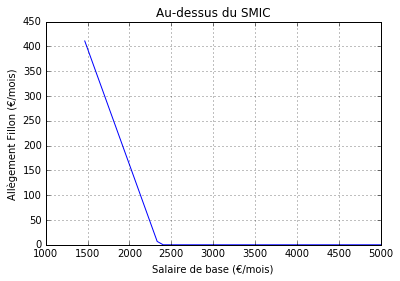

In [37]:
plt.plot(salaire_de_base_over_smic, allegement_fillon_over_smic)
plt.xlabel(u'Salaire de base (€/mois)')
plt.ylabel(u'Allègement Fillon (€/mois)')
plt.title(u'Au-dessus du SMIC')
plt.grid(True)
plt.show()

In [24]:
# On crée ici la variable "salaire_de_base" qui est l'enchainement du segment : 0 €- SMIC mensuel et du segment SMIC mensuel - au-delà
# le crochet [:-1] permet d'éviter que l'on ait l'observation "SMIC mensuel" en doublon

salaire_de_base = np.concatenate([salaire_de_base_under_smic[:-1], salaire_de_base_over_smic])

In [30]:
allegement_fillon = np.concatenate([allegement_fillon_under_smic[:-1], allegement_fillon_over_smic])

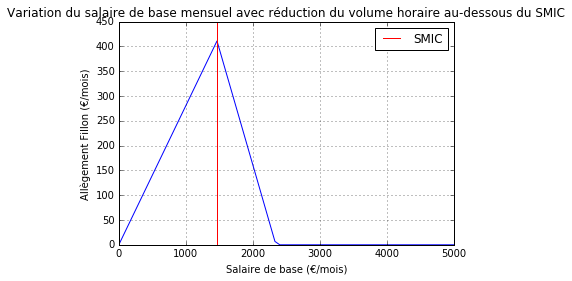

In [54]:
plt.plot(salaire_de_base, allegement_fillon)
# plt.plot(salaire_de_base_under_smic, allegement_fillon_under_smic, label=u'Temps partiel de 0 à 35h/mois')
# plt.plot(salaire_de_base_over_smic, allegement_fillon_over_smic, label=u'Temps plein')
plt.xlabel(u'Salaire de base (€/mois)')
plt.ylabel(u'Allègement Fillon (€/mois)')
plt.title(u'Variation du salaire de base mensuel avec réduction du volume horaire au-dessous du SMIC')
plt.grid(True)
plt.axvline(x=smic_mensuel, color='r', label='SMIC')
plt.legend()
plt.show()